In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

In [274]:
# Load datasets
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")
links = pd.read_csv("links.csv")

In [276]:
# Merge movies and links (1-to-1 via movieId)
movies_links = pd.merge(movies, links, on='movieId', how='left')

In [278]:
movies_links

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,5914996,445030.0
9739,193585,Flint (2017),Drama,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,8391976,483455.0


In [280]:
# Merge ratings (many-to-1)
movies_ratings = pd.merge(ratings, movies_links, on='movieId', how='left')

In [282]:
movies_ratings

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,4972582,381288.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,4425200,324552.0
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,5052448,419430.0
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0


In [284]:
# Merge tags (many-to-1)
merged_df = pd.merge(movies_ratings, tags, on='movieId', how='left', suffixes=('_rating', '_tag'))

In [286]:
merged_df

,userId_rating,movieId,rating,timestamp_rating,title,genres,imdbId,tmdbId,userId_tag,tag,timestamp_tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,1.525286e+09
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,moldy,1.143425e+09
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,old,1.143425e+09
...,...,...,...,...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,emotional,1.525284e+09
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,gritty,1.525284e+09
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,heartbreaking,1.525284e+09
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,predictible plot,1.525284e+09


In [288]:
merged_df.shape

(285762, 11)

In [290]:
merged_df.head()

,userId_rating,movieId,rating,timestamp_rating,title,genres,imdbId,tmdbId,userId_tag,tag,timestamp_tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,1.525286e+09
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,moldy,1.143425e+09
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,old,1.143425e+09


In [292]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285762 entries, 0 to 285761
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   userId_rating     285762 non-null  int64  
 1   movieId           285762 non-null  int64  
 2   rating            285762 non-null  float64
 3   timestamp_rating  285762 non-null  int64  
 4   title             285762 non-null  object 
 5   genres            285762 non-null  object 
 6   imdbId            285762 non-null  int64  
 7   tmdbId            285749 non-null  float64
 8   userId_tag        233213 non-null  float64
 9   tag               233213 non-null  object 
 10  timestamp_tag     233213 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 24.0+ MB


In [294]:
#cleaning missing values
df_cleaned = merged_df.dropna()

In [296]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233213 entries, 0 to 285760
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   userId_rating     233213 non-null  int64  
 1   movieId           233213 non-null  int64  
 2   rating            233213 non-null  float64
 3   timestamp_rating  233213 non-null  int64  
 4   title             233213 non-null  object 
 5   genres            233213 non-null  object 
 6   imdbId            233213 non-null  int64  
 7   tmdbId            233213 non-null  float64
 8   userId_tag        233213 non-null  float64
 9   tag               233213 non-null  object 
 10  timestamp_tag     233213 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 21.4+ MB


In [298]:
#checking for duplicates
Df= df_cleaned.drop_duplicates()

In [300]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233213 entries, 0 to 285760
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   userId_rating     233213 non-null  int64  
 1   movieId           233213 non-null  int64  
 2   rating            233213 non-null  float64
 3   timestamp_rating  233213 non-null  int64  
 4   title             233213 non-null  object 
 5   genres            233213 non-null  object 
 6   imdbId            233213 non-null  int64  
 7   tmdbId            233213 non-null  float64
 8   userId_tag        233213 non-null  float64
 9   tag               233213 non-null  object 
 10  timestamp_tag     233213 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 21.4+ MB


In [302]:
#Converting timestamp to datetime format
Df['datetime_rating'] = pd.to_datetime(Df['timestamp_rating'], unit='s')
Df['datetime_tag'] = pd.to_datetime(Df['timestamp_tag'], unit='s')

In [304]:
Df

,userId_rating,movieId,rating,timestamp_rating,title,genres,imdbId,tmdbId,userId_tag,tag,timestamp_tag,datetime_rating,datetime_tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09,2000-07-30 18:45:03,2006-02-04 09:36:04
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09,2000-07-30 18:45:03,2006-01-14 02:47:05
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,1.525286e+09,2000-07-30 18:45:03,2018-05-02 18:33:33
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,moldy,1.143425e+09,2000-07-30 18:20:47,2006-03-27 02:01:00
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,old,1.143425e+09,2000-07-30 18:20:47,2006-03-27 02:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,dark,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:02
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,emotional,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:06
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,gritty,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:00
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,heartbreaking,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:08


In [306]:
#Extracting year and month from datetime format
Df['rating_year'] = Df['datetime_rating'].dt.year
Df['rating_month'] = Df['datetime_rating'].dt.month
Df['rating_day_of_week'] = Df['datetime_rating'].dt.day_name()

Df['tag_year'] = Df['datetime_tag'].dt.year
Df['tag_month'] = Df['datetime_tag'].dt.month
Df['tag_day_of_week'] = Df['datetime_tag'].dt.day_name()

In [308]:
Df

,userId_rating,movieId,rating,timestamp_rating,title,genres,imdbId,tmdbId,userId_tag,tag,timestamp_tag,datetime_rating,datetime_tag,rating_year,rating_month,rating_day_of_week,tag_year,tag_month,tag_day_of_week
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09,2000-07-30 18:45:03,2006-02-04 09:36:04,2000,7,Sunday,2006,2,Saturday
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09,2000-07-30 18:45:03,2006-01-14 02:47:05,2000,7,Sunday,2006,1,Saturday
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,1.525286e+09,2000-07-30 18:45:03,2018-05-02 18:33:33,2000,7,Sunday,2018,5,Wednesday
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,moldy,1.143425e+09,2000-07-30 18:20:47,2006-03-27 02:01:00,2000,7,Sunday,2006,3,Monday
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,old,1.143425e+09,2000-07-30 18:20:47,2006-03-27 02:01:00,2000,7,Sunday,2006,3,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,dark,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:02,2017,5,Wednesday,2018,5,Wednesday
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,emotional,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:06,2017,5,Wednesday,2018,5,Wednesday
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,gritty,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:00,2017,5,Wednesday,2018,5,Wednesday
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,heartbreaking,1.525284e+09,2017-05-03 21:19:12,2018-05-02 17:59:08,2017,5,Wednesday,2018,5,Wednesday


In [310]:
#Extraction of release year from movie title
Df['release_year'] = Df['title'].str.extract(r'\((\d{4})\)', expand=False).astype('Int64')

In [312]:
#Number of genres a movie has
Df['num_genres'] = Df['genres'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)

In [314]:
Df['num_ratings'] = (
    Df['rating']
    .astype(str)          # Force convert to string
    .str.count(r'\|')
    .add(1)
    .fillna(0)
    .astype(int)
)

In [315]:
Df

,userId_rating,movieId,rating,timestamp_rating,title,genres,imdbId,tmdbId,userId_tag,tag,...,datetime_tag,rating_year,rating_month,rating_day_of_week,tag_year,tag_month,tag_day_of_week,release_year,num_genres,num_ratings
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,...,2006-02-04 09:36:04,2000,7,Sunday,2006,2,Saturday,1995,5,1
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,...,2006-01-14 02:47:05,2000,7,Sunday,2006,1,Saturday,1995,5,1
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,...,2018-05-02 18:33:33,2000,7,Sunday,2018,5,Wednesday,1995,5,1
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,moldy,...,2006-03-27 02:01:00,2000,7,Sunday,2006,3,Monday,1995,2,1
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,old,...,2006-03-27 02:01:00,2000,7,Sunday,2006,3,Monday,1995,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,dark,...,2018-05-02 17:59:02,2017,5,Wednesday,2018,5,Wednesday,2017,2,1
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,emotional,...,2018-05-02 17:59:06,2017,5,Wednesday,2018,5,Wednesday,2017,2,1
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,gritty,...,2018-05-02 17:59:00,2017,5,Wednesday,2018,5,Wednesday,2017,2,1
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,3315342,263115.0,567.0,heartbreaking,...,2018-05-02 17:59:08,2017,5,Wednesday,2018,5,Wednesday,2017,2,1


In [318]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233213 entries, 0 to 285760
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   userId_rating       233213 non-null  int64         
 1   movieId             233213 non-null  int64         
 2   rating              233213 non-null  float64       
 3   timestamp_rating    233213 non-null  int64         
 4   title               233213 non-null  object        
 5   genres              233213 non-null  object        
 6   imdbId              233213 non-null  int64         
 7   tmdbId              233213 non-null  float64       
 8   userId_tag          233213 non-null  float64       
 9   tag                 233213 non-null  object        
 10  timestamp_tag       233213 non-null  float64       
 11  datetime_rating     233213 non-null  datetime64[ns]
 12  datetime_tag        233213 non-null  datetime64[ns]
 13  rating_year         233213 non-nul

Text(0, 0.5, 'Frequency')

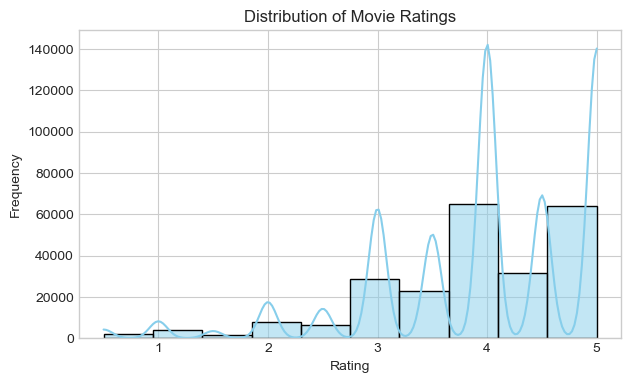

In [320]:
# 1. Distribution of Ratings

plt.figure(figsize=(7,4))
sns.histplot(Df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_8632\519553216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_genres', data=Df, palette='coolwarm')


Text(0, 0.5, 'Number of Movies')

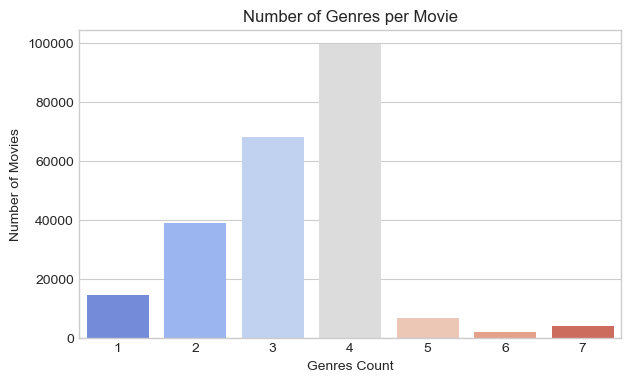

In [321]:
# 2. Number of Genres per movie


plt.figure(figsize=(7,4))
sns.countplot(x='num_genres', data=Df, palette='coolwarm')
plt.title('Number of Genres per Movie')
plt.xlabel('Genres Count')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Average Rating')

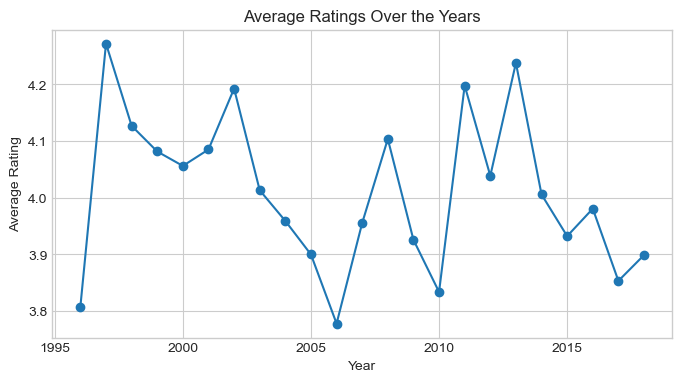

In [322]:
# 3. Ratings over time

rating_trend = Df.groupby('rating_year')['rating'].mean()
plt.figure(figsize=(8,4))
rating_trend.plot(marker='o')
plt.title('Average Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_8632\1951356890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_day_of_week', data=Df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='coolwarm')


Text(0, 0.5, 'Number of Ratings')

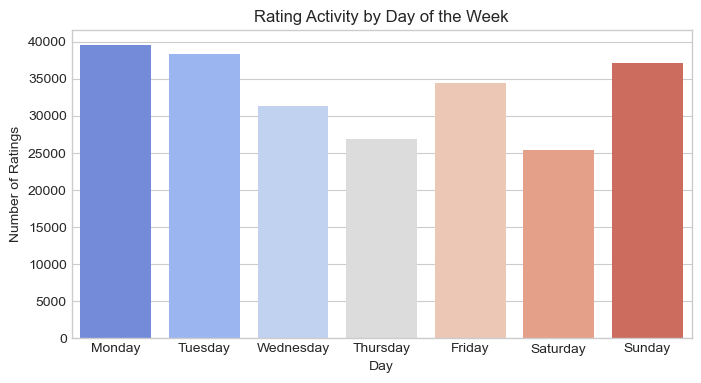

In [323]:
# 4. Rating Activity by Day of Week

plt.figure(figsize=(8,4))
sns.countplot(x='rating_day_of_week', data=Df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='coolwarm')
plt.title('Rating Activity by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Ratings')

In [324]:
# Splitting genres and explode to analyze per-genre averages
genre_df = (
    Df.assign(genre=Df['genres'].str.split('|'))
      .explode('genre')
      .groupby('genre')['rating']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

In [325]:
genre_df

,genre,rating
0,(no genres listed),4.500000
1,Crime,4.123582
2,War,4.094701
3,Thriller,4.074407
4,Drama,4.053360
5,Film-Noir,4.026181
6,Comedy,3.992477
7,Action,3.952206
8,Mystery,3.923477
9,Western,3.912489


In [326]:
genre_cleaned = genre_df.drop(0)

In [327]:
genre_cleaned

,genre,rating
1,Crime,4.123582
2,War,4.094701
3,Thriller,4.074407
4,Drama,4.053360
5,Film-Noir,4.026181
6,Comedy,3.992477
7,Action,3.952206
8,Mystery,3.923477
9,Western,3.912489
10,Sci-Fi,3.901226


C:\Users\OWNER\AppData\Local\Temp\ipykernel_8632\2346515013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_cleaned, x='rating', y='genre', palette='viridis')


Text(0, 0.5, 'Genre')

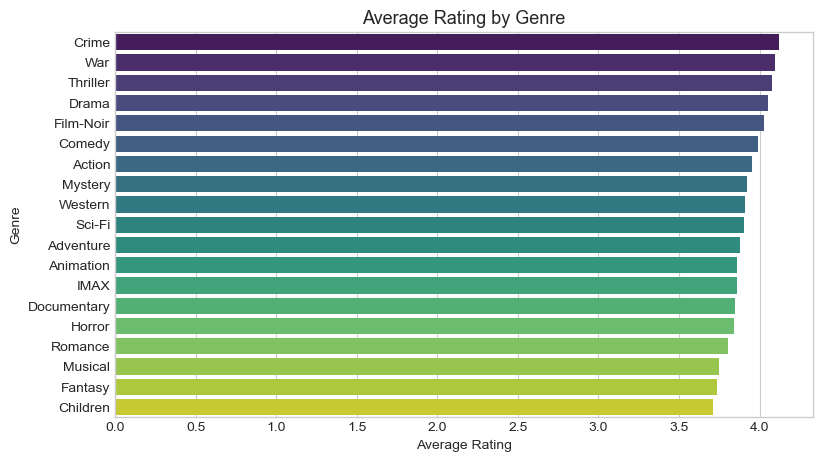

In [329]:
# 5. Average rating by genre

plt.figure(figsize=(9,5))
sns.barplot(data=genre_cleaned, x='rating', y='genre', palette='viridis')
plt.title('Average Rating by Genre', fontsize=13)
plt.xlabel('Average Rating')
plt.ylabel('Genre')

In [331]:
Df.drop(columns=['avg_user_rating', 'avg_movie_rating', 'tag_count'], inplace=True, errors='ignore')

In [332]:
Df.head()

,userId_rating,movieId,rating,timestamp_rating,title,genres,imdbId,tmdbId,userId_tag,tag,...,datetime_tag,rating_year,rating_month,rating_day_of_week,tag_year,tag_month,tag_day_of_week,release_year,num_genres,num_ratings
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,...,2006-02-04 09:36:04,2000,7,Sunday,2006,2,Saturday,1995,5,1
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,...,2006-01-14 02:47:05,2000,7,Sunday,2006,1,Saturday,1995,5,1
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,...,2018-05-02 18:33:33,2000,7,Sunday,2018,5,Wednesday,1995,5,1
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,moldy,...,2006-03-27 02:01:00,2000,7,Sunday,2006,3,Monday,1995,2,1
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,289.0,old,...,2006-03-27 02:01:00,2000,7,Sunday,2006,3,Monday,1995,2,1


In [334]:
# Compute average rating per tag
tag_rating_summary = Df.groupby('tag')['rating'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(15)

In [336]:
tag_rating_summary

,count,mean
tag,,
sci-fi,2527,4.045706
thought-provoking,2487,4.100925
twist ending,2434,4.085045
atmospheric,2227,4.006960
dark comedy,2056,4.061041
superhero,1787,3.454393
psychology,1750,4.074571
Disney,1748,3.711098
time travel,1730,3.867919


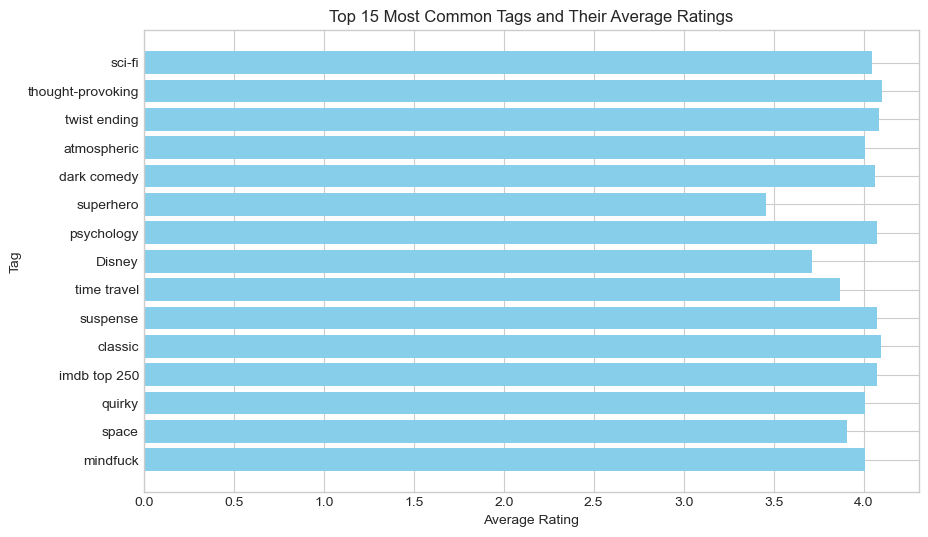

In [337]:
# 6. Most Common Tags and Their Associated Average Ratings

plt.figure(figsize=(10,6))
plt.barh(tag_rating_summary.index, tag_rating_summary['mean'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Tag')
plt.title('Top 15 Most Common Tags and Their Average Ratings')
plt.gca().invert_yaxis()
plt.show()